In [1]:
import sys
import time
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import eBeam_v02 as eBeam2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
c = SI.lightSpeed;
#% matplotlib notebook

In [2]:
#ionization energies
Vi_Ar = 15.75962;
Vi_He = 24.58741;
Vi_Xe = 12.13;

In [3]:
# Beam parameters (Facet II)
gamma = 20000; 
beta = np.sqrt(1 - 1/gamma**2); 
en = 5.3e-6; 
beta_s = np.linspace(.05, 1.5, 100);
sigma_z = 5.2e-6; 
sigma_t = sigma_z / (beta * c); 
Q = 1.5e-9;

beamParams = {
              'gamma'   : gamma,  
              'sigma_z' : sigma_z, 
              'sigma_t' : sigma_t, 
              'beta'    : beta,
              'charge'  : Q, 
              'emitt'   : en, 
              'beta_s'  : beta_s
             }

eBeam2.get_sigma_r(beamParams)
pPk = eBeam2.peak_charge_dens(beamParams)
r, z, t = eBeam2.get_pos(beamParams);
pos = {'r' : r, 'z' : z, 't' : t}


In [4]:
start = time.time()
Er_z, Er_t, rPeak, EPeak = eBeam2.rad_E_field(pos, beamParams, rz = True)

W_z, W_t = eBeam2.ionization_rate(Er_z, Er_t, beamParams, Vi_Ar)
end = time.time()
end - start

15.850888729095459

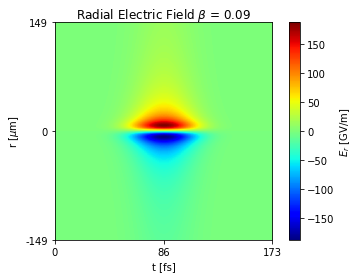

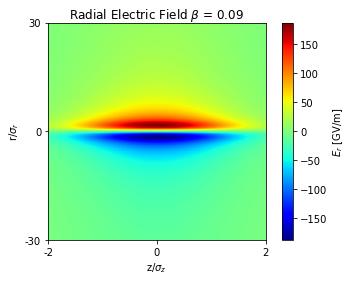

In [4]:
eBeam2.plot_field(Er_t, Er_z, pos, beamParams,'$E_r$ [GV/m]', beta_s, 3)

In [16]:
x = np.array([1,2,3,4,5])
xp = np.reshape(x,(len(x),1))


1

In [20]:
rp = np.reshape(r[0], (len(r[0]),1))

-0.086813478338269717